General Plan:

1. Make a verlet algorithm that will calculate what we need
2. Then plot the points using matplotlib on very small intervals so it looks like a contiguous line
3. See if you can add arrows on the poins using matplotlib

$$a_{eff} = - \omega \times (\omega \times r - 2 \omega \times v_r)$$
r = cartesian position
v_r = cartesian, xdot ydot
omega = constant

#backwards diff
#vel = (pos-prev_pos)/time_step

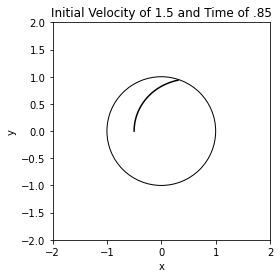

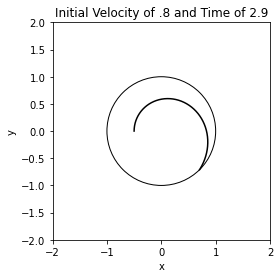

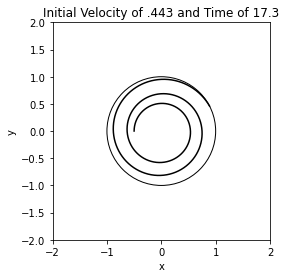

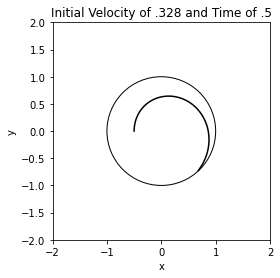

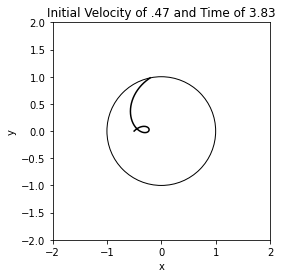

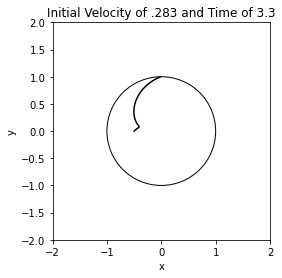

In [120]:
#imports
import numpy as np
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
#Function that 
#Takes in the initial velocity, the duration, and a boolean telling us if it is shot straight up and at a 45 degree angle
def verlet(init_velocity, duration_sec, direction, x_coordinates, y_coordinates):
    iterations = 9000
    time_step = duration_sec/iterations
    p_i = init_velocity*time_step
    y = init_velocity
    if (direction == "vertical"):
        prev_pos = np.array([-.5, -p_i, 0])  
        vel = np.array([0,y,0])
    if (direction == "horizontal"):
        prev_pos = np.array([-p_i-.5, 0, 0])
        vel = np.array([y,0,0])
    if (direction == "diagonal"):
          prev_pos = np.array([-((1/np.sqrt(2))*p_i)-.5, -((1/np.sqrt(2))*p_i), 0])
          vel = np.array([((1/np.sqrt(2))*y),((1/np.sqrt(2))*y),0])
    pos = np.array([-.5,0, 0])
    #Omgega
    omega = np.array([0,0, 1])
    i = 0
    while (i < iterations):
        accel = a_eff(pos, vel, omega)
        final_position = np.array([0,0,0])
        final_position = final_pos(pos, prev_pos, accel, time_step)
        x,y = final_position[0], final_position[1]
        x_coordinates.append(x)
        y_coordinates.append(y)
        prev_pos = pos
        pos = final_position
        #Check to make sure it is in the circle
        pythagorean = np.sqrt(pos[0]**2 + pos[1]**2)
        if (pythagorean > 1):
            break;
        #backwards diff
        vel = (pos-prev_pos)/(time_step)
        i+=1
    return x_coordinates, y_coordinates

#acceleration, [x, y, 0]
def a_eff(pos, vel, omega):
    a = -np.cross(omega, np.cross(omega, pos)) -2*np.cross(omega, vel)
    return a

#returns 2-D vector
def final_pos(init_pos, prev_pos, a_effective, t_step):
    last_term = a_effective*(t_step**2)
    final_pos = 2*init_pos - prev_pos + last_term
    return final_pos

#Plotting
#First Plot
figure, axes = plt.subplots()
axes.set_xlabel('x')
axes.set_ylabel('y')
Drawing_colored_circle = plt.Circle(( 0.0 , 0.0 ), 1, fill=False)
axes.set_aspect( 1 )
plt.axis([-2,2,-2,2])  
axes.add_artist( Drawing_colored_circle )
x_coordinates = []
y_coordinates = []
x_coordinates, y_coordinates = verlet(1.5,.85,"vertical", x_coordinates, y_coordinates)
plt.plot(x_coordinates, y_coordinates, c = 'k')
plt.title( 'Initial Velocity of 1.5 and Time of .85' )
plt.show()

#Second Plot
figure, axes = plt.subplots()
axes.set_xlabel('x')
axes.set_ylabel('y')
Drawing_colored_circle = plt.Circle(( 0.0 , 0.0 ), 1, fill=False)
axes.set_aspect( 1 )
plt.axis([-2,2,-2,2]) 
axes.add_artist( Drawing_colored_circle )
x_coordinates = []
y_coordinates = []
x_coordinates, y_coordinates = verlet(.8,2.9,"vertical", x_coordinates, y_coordinates)
plt.plot(x_coordinates, y_coordinates, c = 'k')
plt.title( 'Initial Velocity of .8 and Time of 2.9' )
plt.show()

#Third Plot
figure, axes = plt.subplots()
axes.set_xlabel('x')
axes.set_ylabel('y')
Drawing_colored_circle = plt.Circle(( 0.0 , 0.0 ), 1, fill=False)
axes.set_aspect( 1 )
plt.axis([-2,2,-2,2]) 
axes.add_artist( Drawing_colored_circle )
x_coordinates = []
y_coordinates = []
x_coordinates, y_coordinates = verlet(.443,17.3,"vertical", x_coordinates, y_coordinates)
plt.plot(x_coordinates, y_coordinates, c = 'k')
plt.title( 'Initial Velocity of .443 and Time of 17.3' )
plt.show()

#Fourth Plot
figure, axes = plt.subplots()
axes.set_xlabel('x')
axes.set_ylabel('y')
Drawing_colored_circle = plt.Circle(( 0.0 , 0.0 ), 1, fill=False)
axes.set_aspect( 1 )
plt.axis([-2,2,-2,2]) 
axes.add_artist( Drawing_colored_circle )
x_coordinates = []
y_coordinates = []
x_coordinates, y_coordinates = verlet(.328,5,"vertical", x_coordinates, y_coordinates)
plt.plot(x_coordinates, y_coordinates, c = 'k')
plt.title( 'Initial Velocity of .328 and Time of .5' )
plt.show()

#Fith Plot
figure, axes = plt.subplots()
axes.set_xlabel('x')
axes.set_ylabel('y')
Drawing_colored_circle = plt.Circle(( 0.0 , 0.0 ), 1, fill=False)
axes.set_aspect( 1 )
plt.axis([-2,2,-2,2]) 
axes.add_artist( Drawing_colored_circle )
x_coordinates = []
y_coordinates = []
x_coordinates, y_coordinates = verlet(.47,3.83,"diagonal", x_coordinates, y_coordinates)
plt.plot(x_coordinates, y_coordinates, c = 'k')
plt.title( 'Initial Velocity of .47 and Time of 3.83' )
plt.show()

#Sixth Plot
figure, axes = plt.subplots()
axes.set_xlabel('x')
axes.set_ylabel('y')
Drawing_colored_circle = plt.Circle(( 0.0 , 0.0 ), 1, fill=False)
axes.set_aspect( 1 )
plt.axis([-2,2,-2,2]) 
axes.add_artist( Drawing_colored_circle )
x_coordinates = []
y_coordinates = []
x_coordinates, y_coordinates = verlet(.283,3.3,"diagonal", x_coordinates, y_coordinates)
plt.plot(x_coordinates, y_coordinates, c = 'k')
plt.title( 'Initial Velocity of .283 and Time of 3.3' )
plt.show()